In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='serif')
from astropy.io import fits, ascii
from astropy.table import Table
import os
import math

import TheCannon
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2016/bin/x86_64-darwin'

In [2]:
dfile = AP_PATH + '/training_sets/west_sample_cut/'
rfile = 'train_ref/west_ref_labels.csv' 
tr_label = ap.loadLabels(rfile, lbl_names=['SPT'])
ds = ap.initializeTrainingSet(data=dfile, ref=rfile, lbl_names=['SPT'], save_base='west_cut')

This is the right version
Loading spectra from directory /Users/Jessica/Desktop/Research/apogee_data/training_sets/west_sample_cut/
Spectra loaded
Loading dataset
Loaded /Users/Jessica/Desktop/Research/apogee_data/training_sets/norm_fluxes/west_cut_norm_tr_flux.npy
Loaded /Users/Jessica/Desktop/Research/apogee_data/training_sets/norm_fluxes/west_cut_norm_tr_ivar.npy


In [3]:
md, synth_fluxes, test_labels = ap.runCannon(ds)

Done training model. 
Inferring Labels


In [30]:
ds.diagnostics_1to1()

Diagnostic for label output vs. input
Saved fig 1to1_label_0.png


In [31]:
trn_labels, crv_labels = ap.crossValidate(ds, lbl_names=['SPT'])

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [1/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [2/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [3/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [4/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [5/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [6/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [7/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [8/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [9/51] sources.

Loading dataset
Done training model. 
Inferring Labels
Inferring Labels
Labeled [10/51] sources.

Loading dataset
Done training

In [33]:
np.save('1_west_results/trn_labels.npy', trn_labels)
np.save('1_west_results/crv_labels.npy', crv_labels)

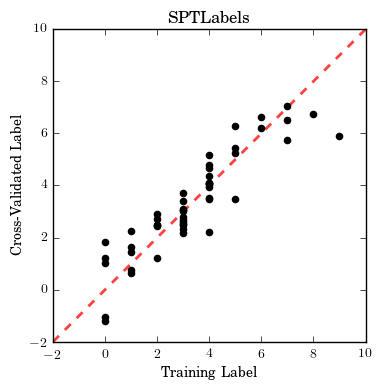

In [34]:
ap.plotCrossValidation(trn_labels, crv_labels, save=True, label_names=['SPT'], out='1_west_results/west_cross_validation.pdf')

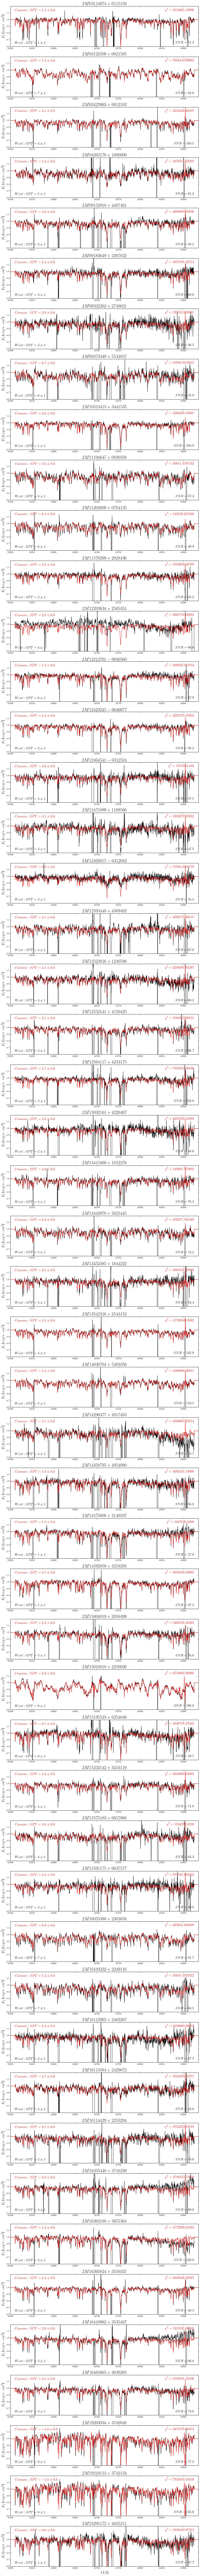

In [6]:
n = 3
snr = pd.read_csv(rfile)['SNR']
ap.plotCannonModels(ds, synth_fluxes, test_labels, save=True, out='1_west_results/Models_Band'+str(n)+'.pdf', \
                 tr_lbl_unc=[1 for i in ds.tr_label], te_lbl_unc=[.6], sigfig=[1], snr=snr, band=n, base='West')

In [9]:
sp = ap.download('2M03425325+2326495', type='ap1d', visit=1, frame=1, use_mask=False)

Retrieving files for 2M03425325+2326495, VISIT1, FRAME1... 

Already have file for 2M03425325+2326495
Already have file for 2M03425325+2326495
Already have file for 2M03425325+2326495
Already have file ap1D-a-02850029.fits
Already have file ap1D-b-02850029.fits
Already have file ap1D-c-02850029.fits


In [12]:
np.ma.array([1, 2, 3], mask = [0, 1, 0])

masked_array(data = [1 -- 3],
             mask = [False  True False],
       fill_value = 999999)